In [6]:
from google.cloud import bigquery
import pandas as pd

In [2]:
client = bigquery.Client()

query="""
SELECT * from goldenfleece.sentiment.daily_sentiment_2020_covid_theme
"""
tone_df = client.query(query).to_dataframe()
tone_df.head()

,DATE,AVG_TONE,AVG_POSITIVE_SCORE,AVG_NEGATIVE_SCORE,AVG_POLARITY,NUMBER_OF_ARTICLES
0,20200101,-6.017551457,2.149165089,8.166716546,10.315881635,18
1,20200102,-5.378190877,1.556339353,6.934530230,8.490869583,50
2,20200103,-5.884740139,1.721482468,7.606222607,9.327705075,40
3,20200104,-5.213566203,2.195057625,7.408623828,9.603681452,42
4,20200105,-5.526246926,1.687839156,7.214086083,8.901925239,18


In [21]:
tone_df = tone_df.astype({"DATE":"datetime64", "AVG_TONE":float, "AVG_POSITIVE_SCORE":float, "AVG_NEGATIVE_SCORE":float, "AVG_POLARITY":float}).set_index("DATE")
tone_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2020-01-01 to 2020-11-25
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AVG_TONE            330 non-null    float64
 1   AVG_POSITIVE_SCORE  330 non-null    float64
 2   AVG_NEGATIVE_SCORE  330 non-null    float64
 3   AVG_POLARITY        330 non-null    float64
 4   NUMBER_OF_ARTICLES  330 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.5 KB


In [3]:
query="""
SELECT * from goldenfleece.sentiment.ftse100
"""
ftse_df = client.query(query).to_dataframe()
ftse_df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-10-17,7168.0,7237.799805,7162.0,7182.299805,7182.299805,1126096700
1,2020-04-22,5641.0,5777.100098,5641.0,5770.600098,5770.600098,866999300
2,2020-07-02,6158.0,6258.600098,6158.0,6240.399902,6240.399902,806189500
3,2020-11-09,5910.0,6258.299805,5910.0,6186.299805,6186.299805,2067706200
4,2020-11-03,5655.0,5787.600098,5655.0,5786.799805,5786.799805,803790300


In [22]:
ftse_df = ftse_df.astype({"Date":"datetime64"}).set_index("Date") 
ftse_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2019-10-17 to 2020-10-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       300 non-null    float64
 1   High       300 non-null    float64
 2   Low        300 non-null    float64
 3   Close      300 non-null    float64
 4   Adj_Close  300 non-null    float64
 5   Volume     300 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.4 KB


In [34]:
adj_close = ftse_df.sort_index()["Adj_Close"]
adj_return = (adj_close.divide(adj_close.shift(1)) - 1).dropna()

In [36]:
merged_df = tone_df.merge(adj_return, left_index=True, right_index=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2020-01-02 to 2020-11-24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AVG_TONE            229 non-null    float64
 1   AVG_POSITIVE_SCORE  229 non-null    float64
 2   AVG_NEGATIVE_SCORE  229 non-null    float64
 3   AVG_POLARITY        229 non-null    float64
 4   NUMBER_OF_ARTICLES  229 non-null    int64  
 5   Adj_Close           229 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 12.5 KB


In [40]:
merged_df.corr(method="pearson")["Adj_Close"].drop(index="Adj_Close")

AVG_TONE              0.074234
AVG_POSITIVE_SCORE    0.123902
AVG_NEGATIVE_SCORE   -0.054841
AVG_POLARITY         -0.020036
NUMBER_OF_ARTICLES    0.019110
Name: Adj_Close, dtype: float64

<AxesSubplot:xlabel='Adj_Close', ylabel='AVG_POSITIVE_SCORE'>

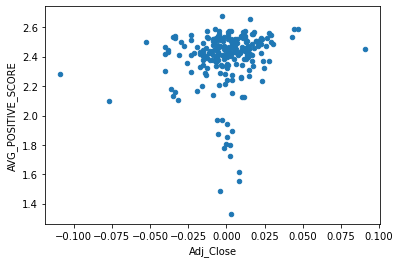

In [41]:
merged_df.plot.scatter(x="Adj_Close", y="AVG_POSITIVE_SCORE")